ML -Assignments – 22April 2025

1. Decision Tree Classification
Use make_classification(n_samples=100, n_features=2) to generate a binary 
classification dataset.
Train a DecisionTreeClassifier, predict, and print the classification report.

In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



2. Decision Tree Regression
Generate data using make_regression(n_samples=100, n_features=1, noise=10).
Train a DecisionTreeRegressor and evaluate using MAE, RMSE, and R² score

In [2]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 12.717462464100484
RMSE: 15.040903951804724
R²: 0.8641248557739871


3. Plot Decision Boundaries of a Decision Tree
Use a 2D dataset (make_classification with 2 features), fit a DecisionTreeClassifier, 
and plot the decision boundary.

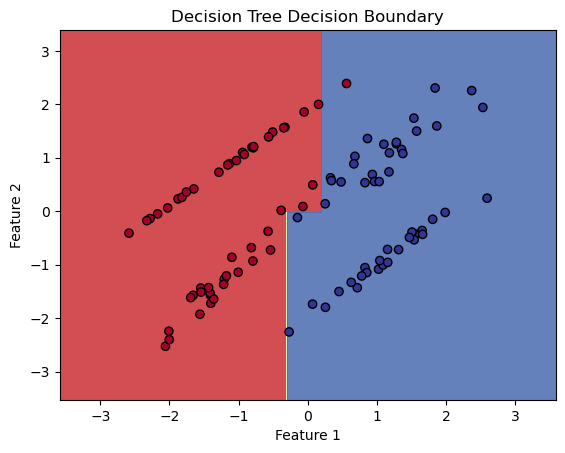

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.RdYlBu)
plt.title("Decision Tree Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

4. Max Depth Impact in Decision Trees
Use the Iris dataset.
Train DecisionTreeClassifier with different max_depth values and compare accuracy on 
the test set

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = [1, 2, 3, 4, 5, None]
results = {}

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[depth] = accuracy

for depth, acc in results.items():
    print(f"Max Depth: {depth}, Accuracy: {acc}")

Max Depth: 1, Accuracy: 0.6333333333333333
Max Depth: 2, Accuracy: 0.9666666666666667
Max Depth: 3, Accuracy: 1.0
Max Depth: 4, Accuracy: 1.0
Max Depth: 5, Accuracy: 1.0
Max Depth: None, Accuracy: 1.0


5. Visualize Tree Structure
Train a decision tree on the Iris dataset and use plot_tree from sklearn.tree to visualize 
the structure of the tree.

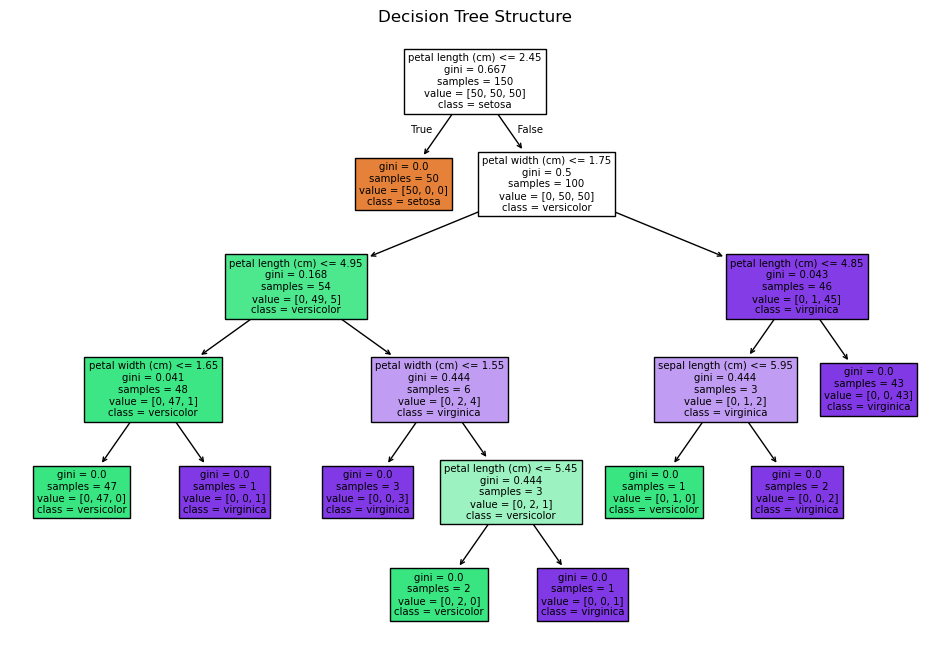

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()

6. Random Forest Classification
Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.
Train a RandomForestClassifier, compute accuracy, and display feature importance.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
feature_importances = pd.DataFrame({'Feature': data.feature_names, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)

print(f"Accuracy: {accuracy}")
print("\nFeature Importances:")
print(feature_importances)

Accuracy: 0.9649122807017544

Feature Importances:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error  

7. Random Forest Regression
Create data using make_regression.
Train a RandomForestRegressor, evaluate on test data using R² and RMSE, and visualize 
predicted vs actual values.

R²: 0.9033027494679949
RMSE: 12.688520676647007


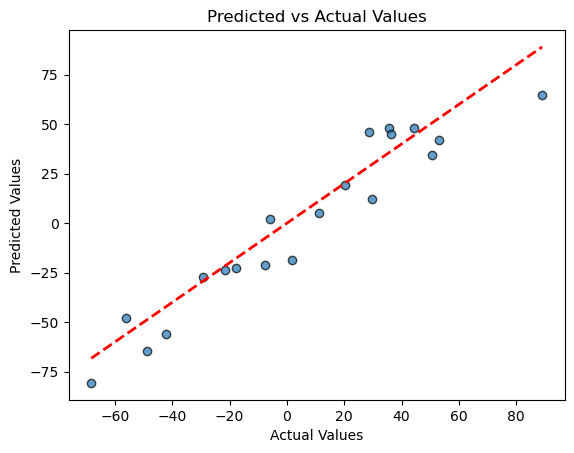

In [7]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

8. Compare Random Forest vs Decision Tree
On a classification dataset (make_classification), compare accuracy, F1-score, and 
confusion matrix between a DecisionTreeClassifier and a RandomForestClassifier.

In [8]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_cm = confusion_matrix(y_test, dt_y_pred)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"F1-Score: {dt_f1}")
print(f"Confusion Matrix:\n{dt_cm}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"F1-Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_cm}")

Decision Tree Metrics:
Accuracy: 0.95
F1-Score: 0.9473684210526315
Confusion Matrix:
[[10  1]
 [ 0  9]]

Random Forest Metrics:
Accuracy: 0.95
F1-Score: 0.9473684210526315
Confusion Matrix:
[[10  1]
 [ 0  9]]


9. Gradient Boosting Classifier
Use the Wine dataset (load_wine() from sklearn).
Train a GradientBoostingClassifier and compare accuracy with 
RandomForestClassifier.

In [9]:
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

Gradient Boosting Classifier Accuracy: 0.9444444444444444
Random Forest Classifier Accuracy: 1.0


10. Gradient Boosting Regressor
Generate regression data and train GradientBoostingRegressor.
Tune parameters like n_estimators, learning_rate and observe impact on R² score.

In [10]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = [
    {"n_estimators": 50, "learning_rate": 0.1},
    {"n_estimators": 100, "learning_rate": 0.05},
    {"n_estimators": 200, "learning_rate": 0.01}
]

for param in params:
    regressor = GradientBoostingRegressor(n_estimators=param["n_estimators"], learning_rate=param["learning_rate"], random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Parameters: n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}")
    print(f"R² Score: {r2}")
    print()

Parameters: n_estimators=50, learning_rate=0.1
R² Score: 0.9134827104523403

Parameters: n_estimators=100, learning_rate=0.05
R² Score: 0.9114429984323108

Parameters: n_estimators=200, learning_rate=0.01
R² Score: 0.9084596388813655



11. Stacking Classifier
On a classification dataset, stack LogisticRegression, DecisionTreeClassifier, and 
RandomForestClassifier using sklearn.ensemble.StackingClassifier.
Compare accuracy with individual base models.


In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('rf', rf_clf)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

log_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

log_acc = accuracy_score(y_test, log_clf.predict(X_test))
dt_acc = accuracy_score(y_test, dt_clf.predict(X_test))
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
stacking_acc = accuracy_score(y_test, stacking_clf.predict(X_test))

print(f"Logistic Regression Accuracy: {log_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"Stacking Classifier Accuracy: {stacking_acc}")

Logistic Regression Accuracy: 0.95
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.95
Stacking Classifier Accuracy: 0.95


12. Stacking Regressor
On regression data, implement stacking using RandomForestRegressor, 
GradientBoostingRegressor, and LinearRegression.
Measure RMSE.

In [18]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
lr_reg = LinearRegression()

stacking_reg = StackingRegressor(
    estimators=[
        ('rf', rf_reg),
        ('gb', gb_reg)
    ],
    final_estimator=lr_reg
)

rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
stacking_reg.fit(X_train, y_train)

rf_y_pred = rf_reg.predict(X_test)
gb_y_pred = gb_reg.predict(X_test)
stacking_y_pred = stacking_reg.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_y_pred))

print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gb_rmse}")
print(f"Stacking Regressor RMSE: {stacking_rmse}")

Random Forest Regressor RMSE: 12.688520676647007
Gradient Boosting Regressor RMSE: 13.362314948496472
Stacking Regressor RMSE: 12.982388866866756


13. CatBoost Classifier
Use a dataset with categorical features (e.g., Titanic dataset or simulate one with pandas).
Train a CatBoostClassifier and evaluate accuracy and F1-score.

In [16]:
!pip install catboost

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier

# Simulating a dataset with categorical features
data = {
    'Pclass': [1, 2, 3, 1, 3, 2, 1, 3, 2, 1],
    'Sex': ['male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female'],
    'Age': [22, 38, 26, 35, 24, 27, 19, 45, 32, 40],
    'Survived': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Encoding categorical features
X = df[['Pclass', 'Sex', 'Age']].copy()  # Explicitly create a copy of the DataFrame
y = df['Survived']
X['Sex'] = X['Sex'].astype('category').cat.codes  # Convert 'Sex' to numerical codes

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining and training the CatBoostClassifier
cat_features = [0, 1]  # Indices of categorical features
model = CatBoostClassifier(cat_features=cat_features, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")

Accuracy: 1.0
F1-Score: 1.0


14. LightGBM Classifier
Generate a dataset with 10+ featu
res using make_classification.
Train a LGBMClassifier, plot feature importance, and compare it to 
RandomForestClassifier.

In [21]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.9 MB/s eta 0:00:00


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 197, number of negative: 203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492500 -> initscore=

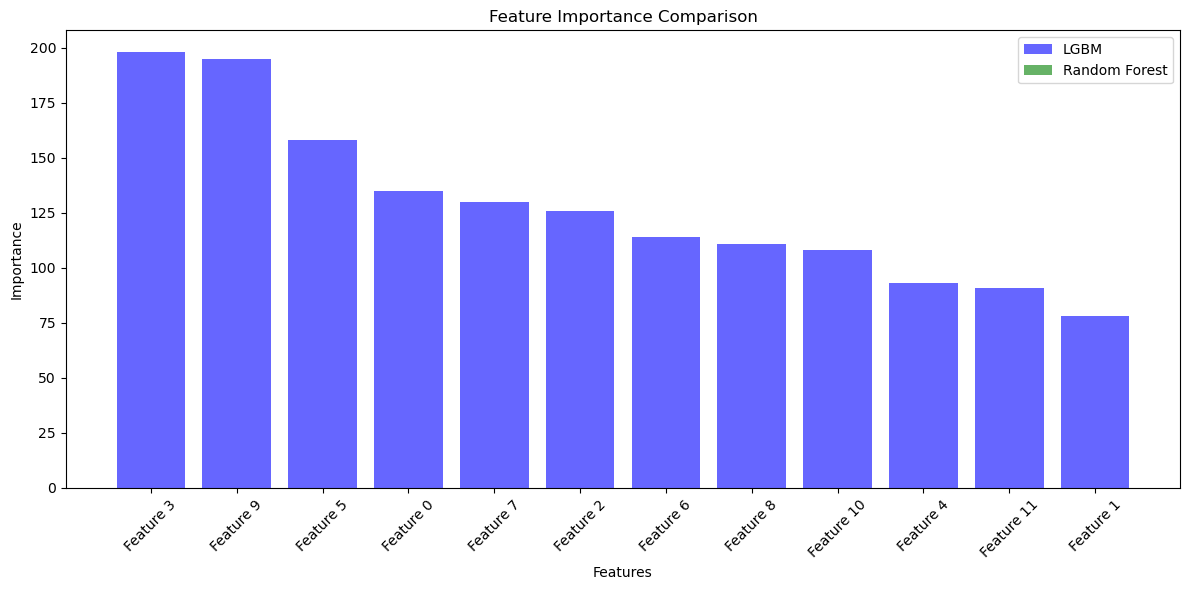

In [25]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

X, y = make_classification(n_samples=500, n_features=12, n_informative=10, n_redundant=2, random_state=42)
X = pd.DataFrame(X, columns=[f'Feature {i}' for i in range(X.shape[1])])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_clf = lgb.LGBMClassifier(random_state=42, min_data_in_leaf=10, min_gain_to_split=0.01, max_depth=6)
lgb_clf.fit(X_train, y_train)
lgb_y_pred = lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"LGBM Classifier Accuracy: {lgb_accuracy}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

lgb_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_clf.feature_importances_}).sort_values(by='Importance', ascending=False)
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_clf.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(lgb_feature_importances['Feature'], lgb_feature_importances['Importance'], color='blue', alpha=0.6, label='LGBM')
plt.bar(rf_feature_importances['Feature'], rf_feature_importances['Importance'], color='green', alpha=0.6, label='Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15. XGBoost Regressor
Use make_regression() data.
Train an XGBRegressor, tune parameters (n_estimators, max_depth, learning_rate), and 
evaluate using R² and RMSE.


In [27]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 4.7/150.0 MB 11.4 MB/s eta 0:00:13
   - -------------------------------------- 7.1/150.0 MB 11.8 MB/s eta 0:00:13
   -- ------------------------------------- 9.4/150.0 MB 11.7 MB/s eta 0:00:12
   --- ------------------------------------ 11.8/150.0 MB 11.7 MB/s eta 0:00:12
   --- ------------------------------------ 14.2/150.0 MB 11.7 MB/s eta 0:00:12
   ---- ----------------------------------- 16.8/150.0 MB 11.7 MB/s eta 0:00:12
   ----- ---------------------------------- 19.1/150.0 MB 11.7 MB/s eta 0:00:12
   ----- ---------------------------------- 21.5/150.0 MB 11.7 MB/s eta 0:00:11
   ------ --------------------------------- 23.9/150.0 MB 11.8 MB/s eta 0:00:11
   ------ --------------------------------- 26.2/150.0 MB 11.8 MB/s eta 0:00:11
   ------- -------------------------------- 28.6/150.

In [28]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import numpy as np

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = [
    {"n_estimators": 50, "max_depth": 3, "learning_rate": 0.1},
    {"n_estimators": 100, "max_depth": 5, "learning_rate": 0.05},
    {"n_estimators": 200, "max_depth": 7, "learning_rate": 0.01}
]

for param in params:
    regressor = xgb.XGBRegressor(
        n_estimators=param["n_estimators"], 
        max_depth=param["max_depth"], 
        learning_rate=param["learning_rate"], 
        random_state=42
    )
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Parameters: n_estimators={param['n_estimators']}, max_depth={param['max_depth']}, learning_rate={param['learning_rate']}")
    print(f"R² Score: {r2}")
    print(f"RMSE: {rmse}")
    print()

Parameters: n_estimators=50, max_depth=3, learning_rate=0.1
R² Score: 0.9323294243456972
RMSE: 22.844426525822005

Parameters: n_estimators=100, max_depth=5, learning_rate=0.05
R² Score: 0.922752779503017
RMSE: 24.407413317115495

Parameters: n_estimators=200, max_depth=7, learning_rate=0.01
R² Score: 0.8889975321661133
RMSE: 29.25813516398856



16. Compare Hierarchical Clustering with K-Means
Dataset: Use make_blobs(n_samples=300, centers=4).
• Cluster the dataset using both AgglomerativeClustering and KMeans.
• Compare the cluster assignments visually.

C:\Users\dbda38\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


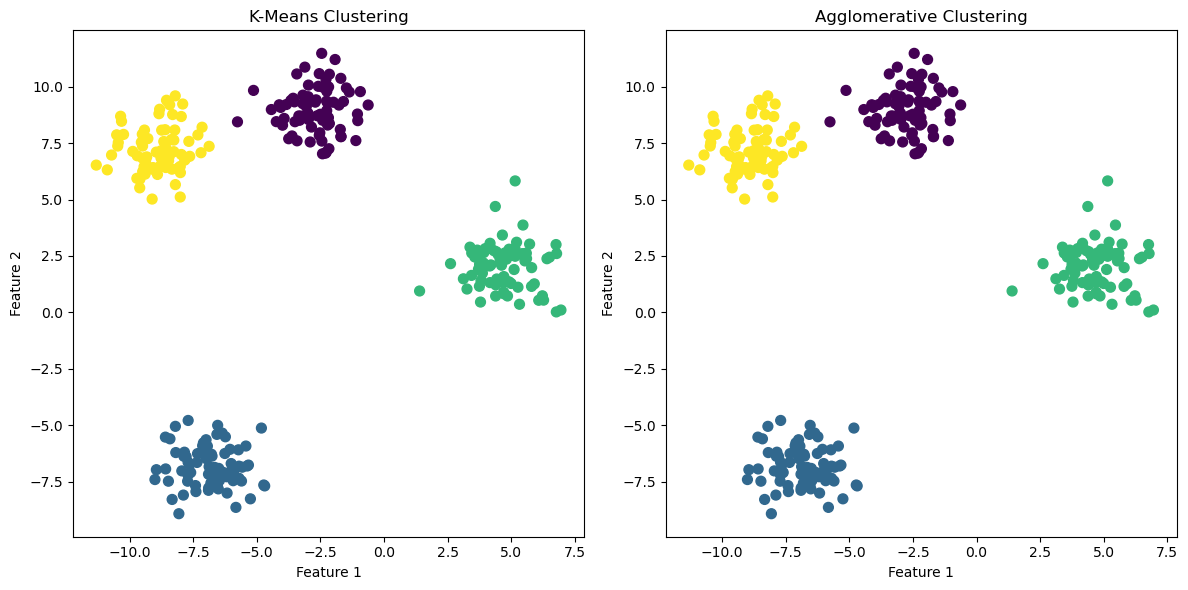

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(X)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

17. Cluster Real-World Dataset (e.g., Mall Customer Segmentation)
Dataset: Use the Mall_Customers.csv dataset (Age, Income, Spending Score).
• Normalize features using StandardScaler.
• Apply AgglomerativeClustering.
• Visualize clusters using scatter plots

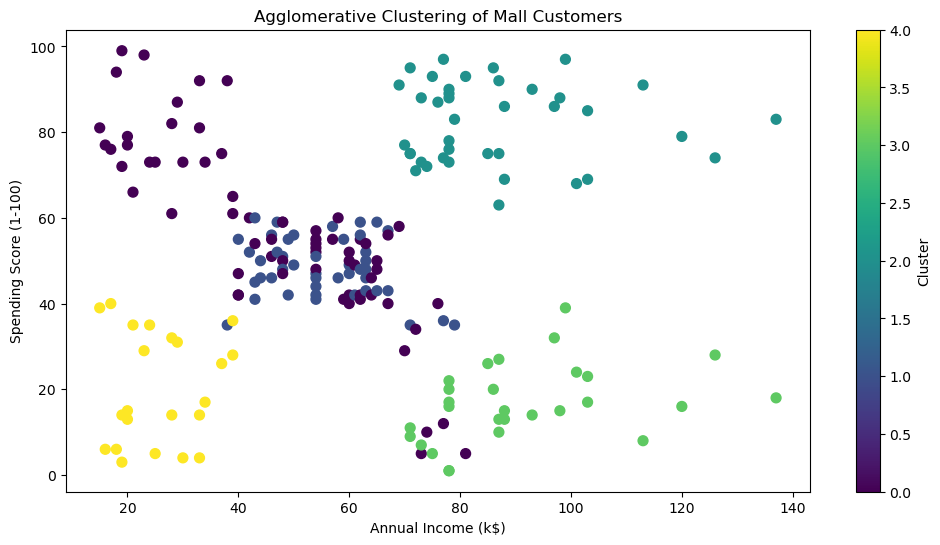

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

url = "./Mall_Customers.csv"
df = pd.read_csv(url)

data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

agg_clustering = AgglomerativeClustering(n_clusters=5)
labels = agg_clustering.fit_predict(normalized_data)

plt.figure(figsize=(12, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

18. Determine Optimal Number of Clusters Using Dendrogram
Dataset: make_blobs(n_samples=100, centers=4, random_state=42)
• Plot the dendrogram and cut it at different heights to determine the number of 
clusters

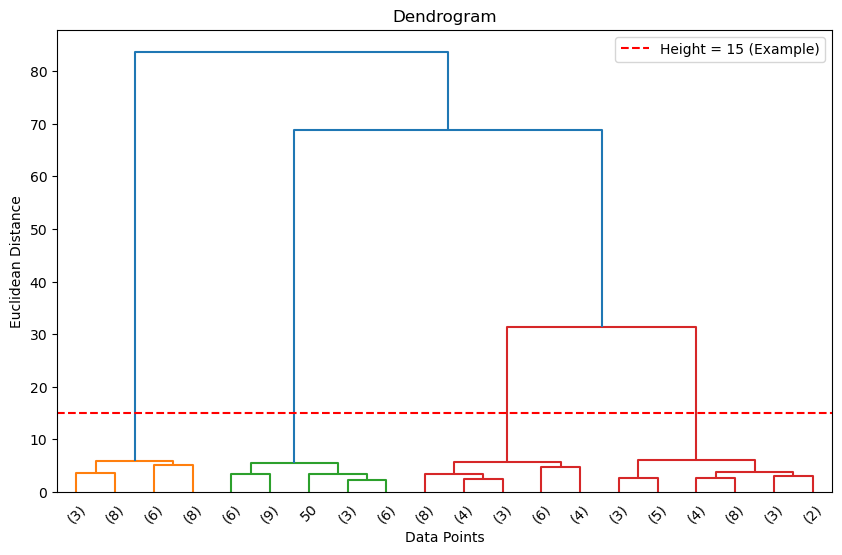

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

X, _ = make_blobs(n_samples=100, centers=4, random_state=42)

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='r', linestyle='--', label='Height = 15 (Example)')
plt.legend()
plt.show()

19. Perform Agglomerative Clustering and Visualize Dendrogram
Dataset: Generate data using make_blobs(n_samples=150, centers=3, 
cluster_std=1.0).
• Apply AgglomerativeClustering from sklearn.
• Use scipy.cluster.hierarchy.dendrogram to visualize the hierarchical 
tree.
• Plot clusters using different colors.

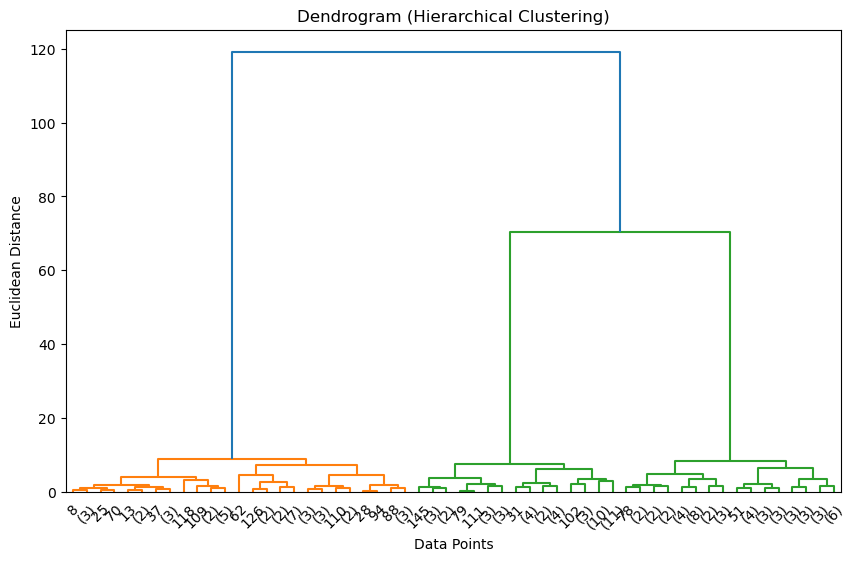

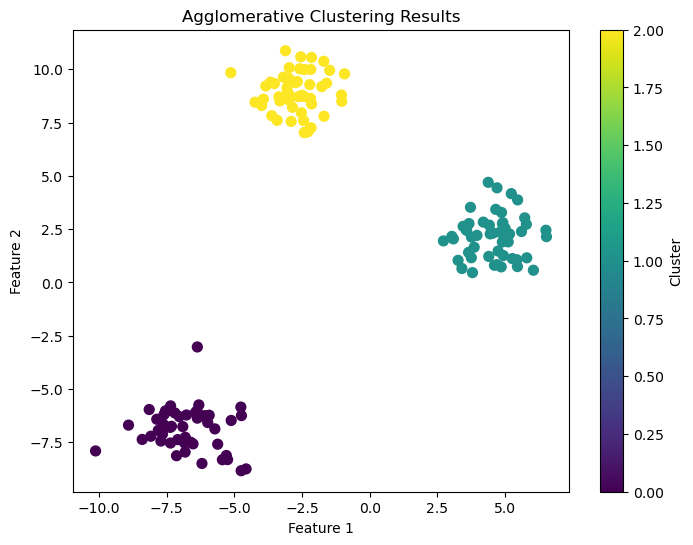

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X, _ = make_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42)

agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

20. Use Breast cancer dataset and perform the above 

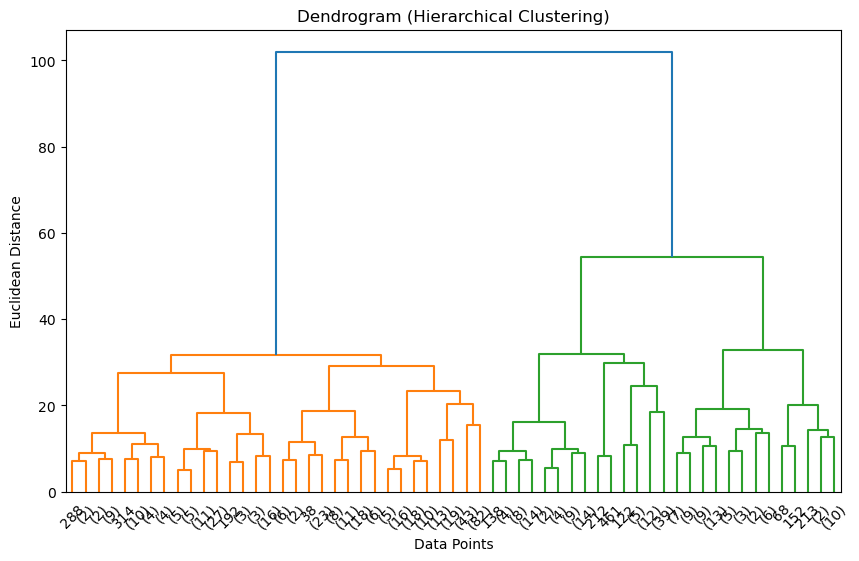

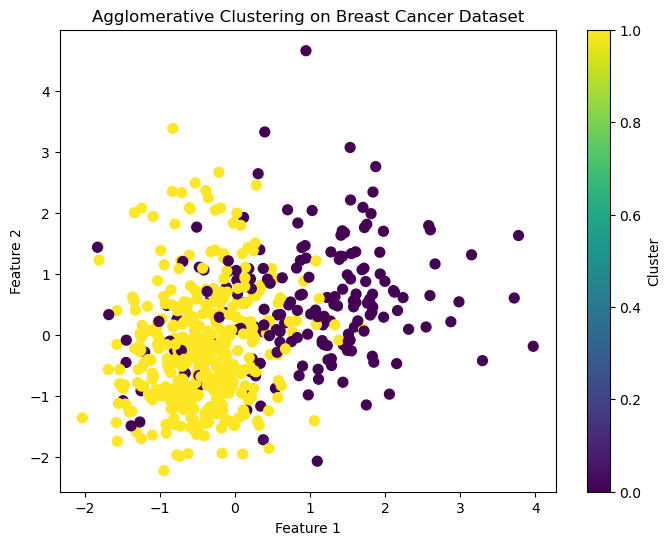

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(X_normalized)

linked = linkage(X_normalized, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering on Breast Cancer Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()